In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import os

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
bboxes = pd.read_csv('./archive/bboxes.csv')

In [4]:
bboxes.head()

,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009fd.jpg,340,301,408,385,hill_mustard
0,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,45,60,101,135,hill_mustard
1,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,0,84,55,168,hill_mustard
2,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,371,62,414,146,hill_mustard
3,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,327,22,385,97,hill_mustard
4,---------------------197_jpg.rf.76bee11dd0c1c8...,148,124,342,406,fireweed


In [5]:
bboxes = pd.DataFrame(np.insert(bboxes.values , 0, values=bboxes.columns, axis= 0 ))
bboxes.columns = ['pollen_name', 'a', 'b', 'c', 'd', 'pollen_type']
bboxes.head()

,pollen_name,a,b,c,d,pollen_type
0,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,340,301,408,385,hill_mustard
1,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,45,60,101,135,hill_mustard
2,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,0,84,55,168,hill_mustard
3,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,371,62,414,146,hill_mustard
4,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,327,22,385,97,hill_mustard


In [6]:
class_map = pd.read_csv('./archive/class_map.csv')

In [7]:
class_map.head(15)

,buckwheat,0
0,clover,1
1,angelica,2
2,angelica_garden,3
3,willow,4
4,hill_mustard,5
5,linden,6
6,meadow_pink,7
7,alder,8
8,birch,9
9,fireweed,10


In [8]:
class_map = pd.DataFrame(np.insert(class_map.values , 0, values=class_map.columns, axis= 0 ))
class_map.columns = ['pollen_type-name', 'pollen_num']
class_map.head()

,pollen_type-name,pollen_num
0,buckwheat,0
1,clover,1
2,angelica,2
3,angelica_garden,3
4,willow,4


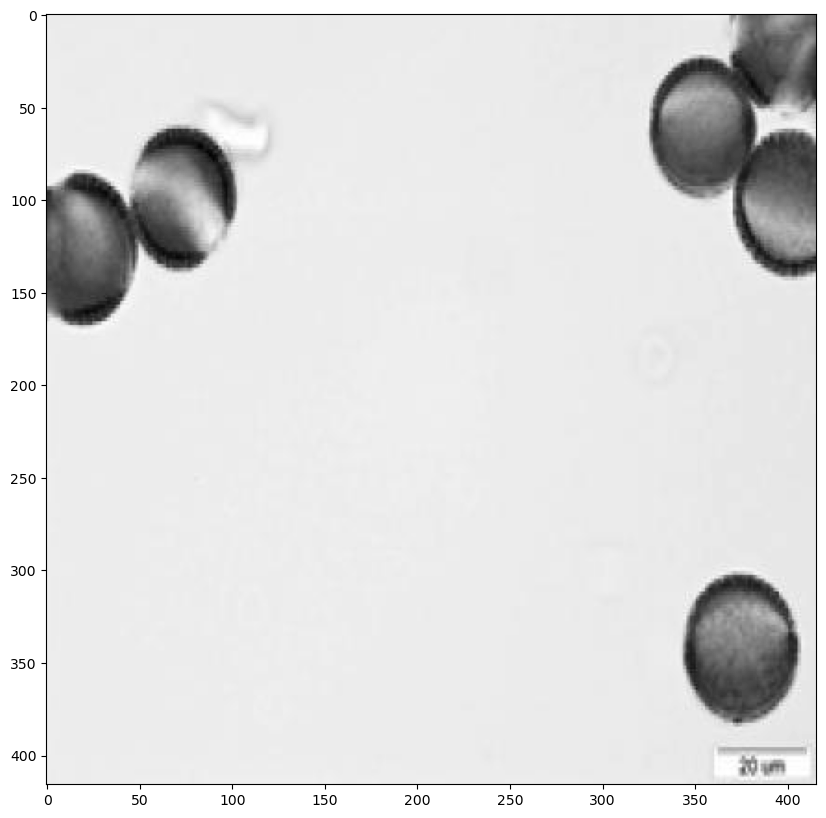

In [9]:
sample_image = cv2.imread('./archive/images/443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009fd.jpg')
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10)) 
plt.imshow(image, cmap = 'gray')
plt.show()

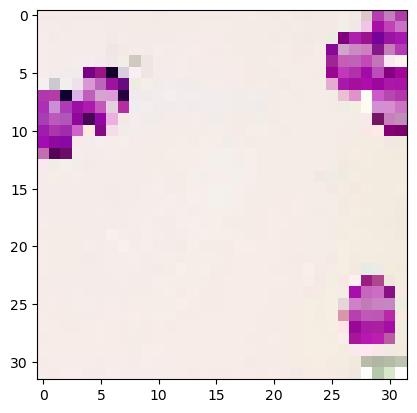

In [10]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = 'gray')
plt.show()

In [11]:
pixels = sample_image.flatten()
pixels

array([244, 235, 232, ..., 255, 253, 254], dtype=uint8)

Repeat the process above for all images

In [12]:
image_paths = list(paths.list_images('./archive/images'))
train_images = []
train_labels = []
class_object = class_map['pollen_type-name']

In [21]:
class_object

0           buckwheat
1              clover
2            angelica
3     angelica_garden
4              willow
5        hill_mustard
6              linden
7         meadow_pink
8               alder
9               birch
10           fireweed
11             nettle
12            pigweed
13           plantain
14             sorrel
15              grass
16               pine
17              maple
18              hazel
19            mugwort
Name: pollen_type-name, dtype: object

In [24]:
#class_map[class_map["pollen_type-name"] == "plantain"]["pollen_num"].index[0]

image_paths[0]

'./archive/images\\---------------------100_jpg.rf.93077deff26c9ada1149c33c74da96b9.jpg'

In [ ]:
for (i, image_path) in enumerate(image_paths):
    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    image = cv2.resize(image, (32, 32))
    
    pixels = image.flatten()
    
    train_images.append(pixels)